# MSGSÜ – Olasılık Dersi Vize Notları Analiz Projesi

Bu çalışma, Mimar Sinan Güzel Sanatlar Üniversitesi İstatistik Bölümü öğrencilerinin 
**Olasılık dersi vize sınavı** notlarını temel istatistiksel yöntemlerle incelemek ve
Python kullanarak veri analizi pratiği kazanmak amacıyla hazırlanmıştır.

Projede:

- CSV formatındaki ham verinin Python ortamına aktarılması ve temizlenmesi,
- Öğrenci notlarının uygun veri yapılarına dönüştürülmesi,
- Ortalama, medyan, varyans ve standart sapma gibi temel istatistiklerin hesaplanması,
- Histogram, kutu grafiği (boxplot) ve dağılım grafiği (scatter plot) ile not dağılımının görselleştirilmesi,
- Sınıf performansına ilişkin genel yorumların yapılması

adımları uygulanmıştır.

## Kullanılan Kütüphaneler

Bu proje, veri analizi süreçlerinde sıkça kullanılan temel Python kütüphanelerinden yararlanmaktadır:

- **pandas** → CSV dosyasını okumak, veriyi tablo formatında düzenlemek
- **matplotlib** → Histogram, boxplot ve scatter plot görsellerini üretmek
- **statistics** → Ortalama, medyan, standart sapma gibi özet istatistikleri hesaplamak

Bu proje, hem Python veri analizi becerilerimi geliştirmek hem de akademik bir veri seti üzerinde 
istatistiksel yorumlama pratiği yapmak için bir uygulama çalışması niteliğindedir.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np

# Grafik stili
plt.style.use("seaborn-v0_8-whitegrid")

In [5]:
# CSV dosyasını okuyoruz
tablo = np.genfromtxt("olasilik_analizi1.csv", delimiter=";", dtype=str, skip_header=1)

In [8]:
# Boş sözlük oluşturma
olasilik_notlari = {}

# Her satırı öğrenci numarası ve not olarak işliyoruz
for eleman in tablo:
    no = str(eleman[0])
    puan = str(eleman[1])

    # GRMD olanlar 0 yapılır, diğerleri sayıya çevrilir
    if puan == "GRMD":
        puan = 0
    else:
        puan = float(puan)

    olasilik_notlari[no] = puan# Sadece notları liste olarak alıyoruz
notlar = list(olasilik_notlari.values())

# Temel istatistikler
ortalama = stats.mean(notlar)
medyan = stats.median(notlar)
std = stats.stdev(notlar)
varyans = stats.variance(notlar)

# Sonuçları yazdırıyoruz
print(f"Ortalama:{round(ortalama,2)}, Medyan:{medyan}, Std Sapma:{round(std,2)}, Varyans:{round(varyans,2)}")

Ortalama:27.29, Medyan:31.0, Std Sapma:12.99, Varyans:168.64


In [13]:
# Öğrenci numarası ve notları DataFrame formatına çeviriyoruz
df1 = pd.DataFrame({
    "ogrenciler": list(olasilik_notlari.keys()),
    "notlar": notlar})

# İlk satırları görüntüleme
print(df1.head())

    ogrenciler  notlar
0  20191101006     0.0
1  20191101077     0.0
2  20211101045     0.0
3  20221101072    22.0
4  20221101077     0.0


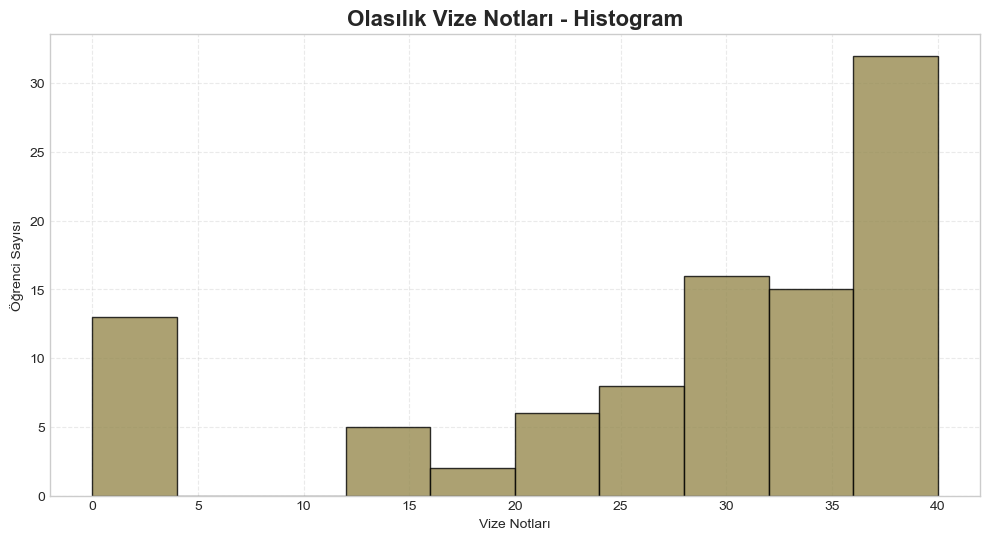

In [18]:
# Histogram çizimi
plt.figure(figsize=(12,6))
plt.hist(notlar, bins=10, color="#978A4F", edgecolor="black", alpha=0.8)

plt.title("Olasılık Vize Notları - Histogram", fontsize=16, fontweight="bold")
plt.xlabel("Vize Notları")
plt.ylabel("Öğrenci Sayısı")
plt.grid(True, linestyle="--", alpha=0.4)

plt.savefig("hist_olasilik_vize.png", dpi=300, bbox_inches="tight")
plt.show()

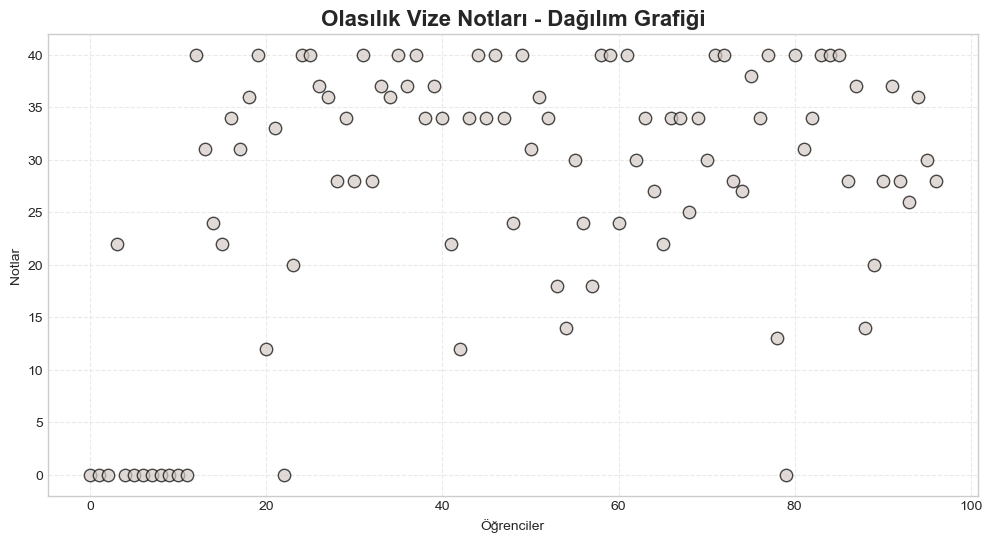

In [19]:
# X ekseni: öğrenci sırası, Y ekseni: notlar
x = range(len(df1))
y = df1["notlar"]

plt.figure(figsize=(12,6))
plt.scatter(x, y, color="#D3CAC4", edgecolor="black", s=80, alpha=0.7)

plt.title("Olasılık Vize Notları - Dağılım Grafiği", fontsize=16, fontweight="bold")
plt.xlabel("Öğrenciler")
plt.ylabel("Notlar")
plt.grid(True, linestyle="--", alpha=0.4)

plt.savefig("scatter_olasilik_vize.png", dpi=300, bbox_inches="tight")
plt.show()

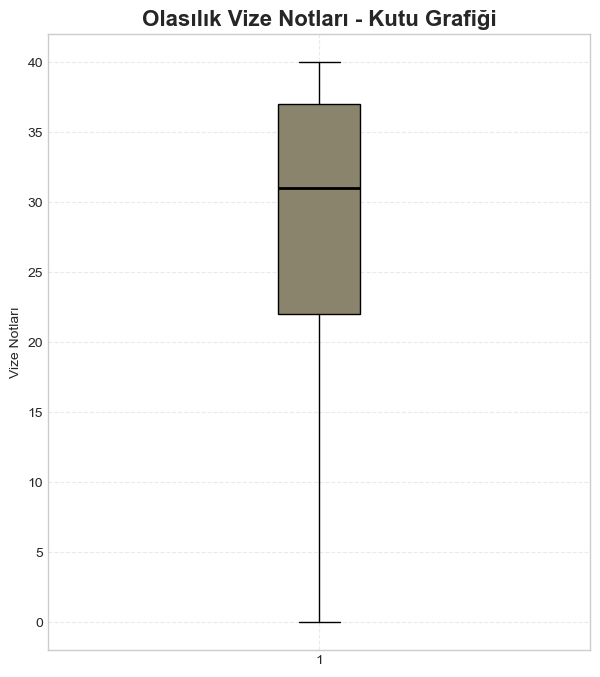

In [20]:
# Kutu grafiği
plt.figure(figsize=(7,8))
plt.boxplot(
    notlar,
    patch_artist=True,
    boxprops=dict(facecolor="#8b846d", color="black"),
    medianprops=dict(color="black", linewidth=2),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=8, markerfacecolor="black", alpha=0.6)
)

plt.title("Olasılık Vize Notları - Kutu Grafiği", fontsize=16, fontweight="bold")
plt.ylabel("Vize Notları")
plt.grid(True, linestyle="--", alpha=0.4)

plt.savefig("boxplot_olasilik_vize.png", dpi=300, bbox_inches="tight") 
plt.show()